![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

# Feature Engineering

## Feature Engineering on Census Data

In this project, you will be working with Census Data from 1994 to put in practice all the techniques you learned on previous lessons.


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## What we know about the data

The 1994 Census Income dataset has **48,842 entries** (split into train and test). Each entry contains the following information about an individual:
- **age**: the age of an individual
- **workclass**: a general term to represent the employment status of an individual
- **fnlwgt**: final weight. In other words, this is the number of people the census believes the entry represents.
- **education**: the highest level of education achieved by an individual.
- **education_num**: the highest level of education achieved in numerical form.
- **marital_status**: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
- **occupation**: the general type of occupation of an individual
- **relationship**: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute.
- **race**: Descriptions of an individual’s race
- **sex**: the biological sex of the individual
- **capital_gain**: capital gains for an individual
- **capital_loss**: capital loss for an individual
- **hours_per_week**: the hours an individual has reported to work per week
- **native_country**: country of origin for an individual
- **income_bracket**: whether or not an individual makes more than $50,000 annually.

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Initial EDA

In [270]:
import pandas as pd
# Use this to view all of your data
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [271]:
# Pull in the train set
df_train = pd.read_csv('datasets/wage_train.csv')
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [272]:
# Pull in the test set, apply the same processes as train, then predict
df_test = pd.read_csv('datasets/wage_test.csv')
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


---
### Remember that:

- We **develop from train**.  
- We **apply to test**.

In [273]:
# First step in exploration
# Use .describe to look at the data
df_train.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## What we get from the data description

- It seems like fnlwgt isn't really a characteristic of the individuals
- Also, since the Census Bureau assigns that value, we won't likely have it when making predictions on unseen data.

> Let's remove that feature

In [274]:
# Remove the fnlwgt feature from train and test
df_train.drop('fnlwgt',axis=1,inplace=True)
df_test.drop('fnlwgt',axis=1,inplace=True)

---
### List all binary columns and indicate if the classes are balanced

1. gender - imbalanced
2. income_bracket - imbalanced


---
### List all nominal columns and indicate the majority class

1. workclass - Private
3. marital_status - Married-civ-spouse
4. occupation - Prof-specialty
5. relationship - Husband
6. race - White
7. native_country - United-States

---
### List all ordinal columns and indicate the majority class

1. education - HS-grad

> **Note**: occupation could have somewhat of an ordinal quality to it, but it's not clear how to order some of the occupations.  It also seems as if the ordinal quality may be more related to either work/life balance or income -> or some combination of the two.  In absence of a good way to rank occupations, we will treat them as nominal.

---
### List any cyclical or date columns

There are none

---
### List all continuous columns with basic stats (mean, std, min and max)

1. Age: mean -> 38.6, std -> 13.6, min -> 17, max -> 90
2. fnlwgt: mean -> 190,000, std -> 105,550, min -> 12,285, max -> 1,500,000
3. capital_gain: mean -> 1077.65, std -> 7385.29, min -> 0, max -> 99,999
4. capital_loss: mean -> 87.30, std -> 402.96, min -> 0, max -> 4,356
5. hours_per_week: mean -> 40.44, std -> 12.35, min -> 1, max -> 99

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## What else can we get from the description?

- That 'education_num' is the numeric representation of 'education'
- We can drop 'education' since it is ordinal and already numerically represented by 'education_num'

In [275]:
# Drop education from train and test
df_train.drop('education',axis=1,inplace=True)
df_test.drop('education',axis=1,inplace=True)

---
### Final piece of information we get from the description 

There are a few serious majority categories:

   - United States has very nearly ALL of the native_country examples.  This is a serious majority category. (native_country feature) 
   - White is the same. (race feature)
   - Private is the same. (workclass feature)
   - Married-civ-spouse isnt' as big, but we'll remove it too.  It can help with collinearity.
   
When we get dummies for this variable, instead of drop_first we'll want to drop United States and White specifically.


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Missing Data

We don't see any nulls using .describe().  Are there any **hidden nulls** in this data?
What kind of features would we check for hidden nulls?

This will require a little manual work.

> Use .value_counts() to check for hidden nulls.  I've done the first one for you.

In [276]:
# Check for hidden nulls in workclass
df_train.workclass.value_counts(dropna=False)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [277]:
# We have a hidden null in workclass.  
# Let's replace it with a true null and figure out what to do with it later.
df_train.loc[df_train.workclass=='?','workclass'] = None
df_train.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

---
### Hmmmm.  That didn't work.

Why isn't that working?  

> Let's have a different look at the values with .unique()

In [278]:
# Look at the values in workclass with the unique() method
df_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## There are some extra spaces in those strings.

> Let's clean that up -> it will make life easier later.

In [279]:
# Clean all of the extra white space from object (string value) columns using the string method .strip()
for col in df_train.columns:
    if df_train[col].dtype == 'O':
        df_train[col] = df_train[col].apply(lambda x: x.strip())

# check results
df_train.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [280]:
# Now let's do the same to test
for col in df_test.columns:
    if df_test[col].dtype == 'O':
        df_test[col] = df_test[col].apply(lambda x: x.strip())

# check results
df_test.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Now that that's all clean:

> Let's try to fix the nulls again

In [281]:
# Let's replace the ? in workclass with a true null
df_train['workclass'] = df_train.workclass.apply(lambda x: None if x=='?' else x)
# Now do the same to test
df_test['workclass'] = df_test.workclass.apply(lambda x: None if x=='?' else x)
# Check results
df_train.workclass.value_counts(dropna=False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## What else do we get from our .describe() above that can help us here?

- We see that there are no negative values.  We don't need to check for -1 representation of nulls.

> Let's check the remaining nominal features for hidden nulls and fix them.

In [282]:
# Create a list of nominal features
nominal = ['workclass','marital_status','occupation','relationship','race','native_country']

In [283]:
# Check each of the nominal features for hidden nulls using .value_counts()
# If you find hidden nulls, convert them to true nulls
df_train.marital_status.value_counts(dropna=False)

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [284]:
df_train.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [285]:
# Occupation also has a hidden null ?.  
# Fix it
df_train['occupation'] = df_train.occupation.apply(lambda x: None if x=='?' else x)
df_train.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [286]:
df_test['occupation'] = df_test.occupation.apply(lambda x: None if x=='?' else x)
df_test.occupation.value_counts()

Prof-specialty       2032
Exec-managerial      2020
Craft-repair         2013
Sales                1854
Adm-clerical         1841
Other-service        1628
Machine-op-inspct    1020
Transport-moving      758
Handlers-cleaners     702
Tech-support          518
Farming-fishing       496
Protective-serv       334
Priv-house-serv        93
Armed-Forces            6
Name: occupation, dtype: int64

In [287]:
df_train.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [288]:
df_train.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [289]:
df_train.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [290]:
# We have a hidden null in native_country as well.
# Let's fix it
df_train['native_country'] = df_train.native_country.apply(lambda x: None if x=='?' else x)
df_train.native_country.value_counts(dropna=False)

United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [291]:
df_test['native_country'] = df_test.native_country.apply(lambda x: None if x=='?' else x)
df_test.native_country.value_counts(dropna=False)

United-States                 14662
Mexico                          308
NaN                             274
Philippines                      97
Puerto-Rico                      70
Germany                          69
Canada                           61
India                            51
El-Salvador                      49
China                            47
Cuba                             43
England                          37
South                            35
Dominican-Republic               33
Italy                            32
Haiti                            31
Japan                            30
Portugal                         30
Poland                           27
Columbia                         26
Jamaica                          25
Guatemala                        24
Greece                           20
Vietnam                          19
Ecuador                          17
Iran                             16
Peru                             15
Nicaragua                   

#### Did you check every nominal feature?

#### Did you apply any necessary changes to both train and test data?


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## What do we do with the null values?

> Let's see how much data we lose if we remove all rows with null values

In [292]:
# Try removing all rows with nulls (you probably want to save the result to a new object)
df_no_nulls = df_train.dropna(axis=0,how='any')

# How much of the data was removed?
(len(df_train)-len(df_no_nulls))/len(df_train)

0.07367709836921471

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## If removing all null rows removes less than 20% of the data:

Go ahead and remove all null rows for now. We can come back in a future iteration and spend more time here if model performance isn't as high as we would like for it to be.

In [293]:
# Remove all rows with null values in train and test
df_train.dropna(axis=0,how='any',inplace=True)
df_test.dropna(axis=0,how='any',inplace=True)
# Check the new length of your train and test sets
len(df_train),len(df_test)

(30162, 15060)

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Convert string values to numeric

**Remember**: all of our values have to be numeric for a machine learning algorithm to accept and understand them.

> Let's convert all of our string values to numeric now.

---
### Nominal to numeric

In [294]:
nominal

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [295]:
# Let's change all of our nominal features to numeric format
# Use the shortcut method get_dummies to get dummy columns for train data
# Remember we want to pick the category to drop with race and native_country
drop_first_dummies = ['occupation','relationship']
other_dummies = ['marital_status','workclass','race','native_country']
df_train_dummies = pd.get_dummies(df_train,columns=drop_first_dummies,drop_first=True,prefix='nom_dum')
df_train_dummies = pd.get_dummies(df_train_dummies,columns=other_dummies,prefix='nom_dum')
# Drop the White dummy column and United States dummy col
df_train_dummies.drop(['nom_dum_Private','nom_dum_White','nom_dum_United-States','nom_dum_Married-civ-spouse'],axis=1,inplace=True)
# We can get a full list of columns to match to test using .columns

In [296]:
# Now we apply this to our test set.  
# Do NOT drop_first here.  We'll use our train column list to match up the data
df_test_dummies = pd.get_dummies(df_test,columns=nominal,prefix='nom_dum')
df_test_dummies = df_test_dummies[df_train_dummies.columns]

KeyError: "['nom_dum_Holand-Netherlands'] not in index"

---
### Did you get an error?

I did. Looks like we have a feature in train that isn't in test.

We'll need to add it to test.

In [297]:
# the Holand-Netherlands feature exists in train but not in test.  We'll need to add that column to our test data
# It's a binary column.  We'll fill it with all 0s
# Make sure the name matches exactly what you see in the KeyError
df_test_dummies['nom_dum_Holand-Netherlands'] = 0
# Now match up the train and test cols
df_test_dummies = df_test_dummies[df_train_dummies.columns].copy()

In [298]:
# Compare the columns in train dummies to test dummies
for train_col,test_col in zip(df_train_dummies.columns,df_test_dummies.columns):
    print(train_col,'<---->',test_col)

age <----> age
education_num <----> education_num
gender <----> gender
capital_gain <----> capital_gain
capital_loss <----> capital_loss
hours_per_week <----> hours_per_week
income_bracket <----> income_bracket
nom_dum_Armed-Forces <----> nom_dum_Armed-Forces
nom_dum_Craft-repair <----> nom_dum_Craft-repair
nom_dum_Exec-managerial <----> nom_dum_Exec-managerial
nom_dum_Farming-fishing <----> nom_dum_Farming-fishing
nom_dum_Handlers-cleaners <----> nom_dum_Handlers-cleaners
nom_dum_Machine-op-inspct <----> nom_dum_Machine-op-inspct
nom_dum_Other-service <----> nom_dum_Other-service
nom_dum_Priv-house-serv <----> nom_dum_Priv-house-serv
nom_dum_Prof-specialty <----> nom_dum_Prof-specialty
nom_dum_Protective-serv <----> nom_dum_Protective-serv
nom_dum_Sales <----> nom_dum_Sales
nom_dum_Tech-support <----> nom_dum_Tech-support
nom_dum_Transport-moving <----> nom_dum_Transport-moving
nom_dum_Not-in-family <----> nom_dum_Not-in-family
nom_dum_Other-relative <----> nom_dum_Other-relative
nom_

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

##  If your columns match-up, move on!  If not, you better find the bug now.

---
### Binary to numeric

In [299]:
# Create a list of binary features
binary = ['gender','income_bracket']
# Create mappings for binary cols
# Keep information needed to apply this to test data
def convert_binary(df,binary_cols):
    binary_mappings = dict()
    for col in binary_cols:
        binary_map = {value:idx for idx,value in enumerate(df[col].unique().tolist())}
        binary_mappings[col] = binary_map
        df['bin_'+col] = df[col].map(binary_map)
    return df,binary_mappings

In [300]:
# Convert train binary to numeric
# Copy your train data into a new data frame 'df_train_binary' (just trust me on this one)
df_train_binary = df_train_dummies.copy()
df_train_binary,binary_mappings = convert_binary(df_train_binary,binary)

In [301]:
# Check results with .head()
df_train_binary.head()

,age,education_num,gender,capital_gain,capital_loss,hours_per_week,income_bracket,nom_dum_Armed-Forces,nom_dum_Craft-repair,nom_dum_Exec-managerial,nom_dum_Farming-fishing,nom_dum_Handlers-cleaners,nom_dum_Machine-op-inspct,nom_dum_Other-service,nom_dum_Priv-house-serv,nom_dum_Prof-specialty,nom_dum_Protective-serv,nom_dum_Sales,nom_dum_Tech-support,nom_dum_Transport-moving,nom_dum_Not-in-family,nom_dum_Other-relative,nom_dum_Own-child,nom_dum_Unmarried,nom_dum_Wife,nom_dum_Divorced,nom_dum_Married-AF-spouse,nom_dum_Married-spouse-absent,nom_dum_Never-married,nom_dum_Separated,nom_dum_Widowed,nom_dum_Federal-gov,nom_dum_Local-gov,nom_dum_Self-emp-inc,nom_dum_Self-emp-not-inc,nom_dum_State-gov,nom_dum_Without-pay,nom_dum_Amer-Indian-Eskimo,nom_dum_Asian-Pac-Islander,nom_dum_Black,nom_dum_Other,nom_dum_Cambodia,nom_dum_Canada,nom_dum_China,nom_dum_Columbia,nom_dum_Cuba,nom_dum_Dominican-Republic,nom_dum_Ecuador,nom_dum_El-Salvador,nom_dum_England,nom_dum_France,nom_dum_Germany,nom_dum_Greece,nom_dum_Guatemala,nom_dum_Haiti,nom_dum_Holand-Netherlands,nom_dum_Honduras,nom_dum_Hong,nom_dum_Hungary,nom_dum_India,nom_dum_Iran,nom_dum_Ireland,nom_dum_Italy,nom_dum_Jamaica,nom_dum_Japan,nom_dum_Laos,nom_dum_Mexico,nom_dum_Nicaragua,nom_dum_Outlying-US(Guam-USVI-etc),nom_dum_Peru,nom_dum_Philippines,nom_dum_Poland,nom_dum_Portugal,nom_dum_Puerto-Rico,nom_dum_Scotland,nom_dum_South,nom_dum_Taiwan,nom_dum_Thailand,nom_dum_Trinadad&Tobago,nom_dum_Vietnam,nom_dum_Yugoslavia,bin_gender,bin_income_bracket
0,39,13,Male,2174,0,40,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,Male,0,0,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,9,Male,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53,7,Male,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,13,Female,0,0,40,<=50K,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [302]:
# Now let's appply the mappings to our test set
# Don't worry if these results look funny.  Try to apply the mappings and then we'll figure out
# what is going on here
df_test_binary = pd.DataFrame()
for col in binary_mappings.keys():
    df_test_binary['bin_'+col] = df_test_dummies[col].map(binary_mappings[col])
df_test_binary.head()

,bin_gender,bin_income_bracket
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
5,0,NaN


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Do your results on test look wrong?

That's ok, mine do too.

> Let's figure out why

In [303]:
# Why didn't our mapping work on income_bracket?
# Let's have a look at our test data before dealing with binary
df_test_dummies.income_bracket.value_counts()

<=50K.    11360
>50K.      3700
Name: income_bracket, dtype: int64

In [304]:
# What did our train feature look like?
df_train_dummies.income_bracket.value_counts()

<=50K    22654
>50K      7508
Name: income_bracket, dtype: int64

In [305]:
# The test values have '.' at the end.  
# Let's clean this up and try again
df_test_dummies['income_bracket'] = df_test_dummies.income_bracket.apply(lambda x: x.replace('.',''))
df_test_dummies.income_bracket.value_counts()

<=50K    11360
>50K      3700
Name: income_bracket, dtype: int64

In [306]:
# Now apply the mappings to our test set
df_test_binary = pd.DataFrame()
for col in binary_mappings.keys():
    df_test_binary['bin_'+col] = df_test_dummies[col].map(binary_mappings[col])
df_test_binary.head()

,bin_gender,bin_income_bracket
0,0,0
1,0,0
2,0,1
3,0,1
5,0,0


---
### Phew!  Glad we cleared that up!

You'll spend the majority of your time cleaning up your data like this.  It's not fun, but it must be done.  I've never worked with any company that has perfectly clean data.

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Pulling all of the data together

Now that we have our dummies, binary mappings and original continuous data, we need to put it together.

> Let's use pd.concat() to pull all of the pieces of data together

In [307]:
# df_train_dummies is already in one dataframe

In [308]:
# For test, you need to pull the dummies df and the binary df together
len(df_test_dummies),len(df_test_binary)

(15060, 15060)

#### If the length of your train data is not the same across all of your train sets, something is wrong.  Go back and look for a bug.

#### The length of your test sets should all match each other as well.

#### Test length should be a small percent of your train length.  These should not match.

In [309]:
# Combine all of the relevant columns
# List all columns we want to keep from the df
relevant_cols = ['education_num','capital_gain','capital_loss','age','hours_per_week']
bin_cols = [col for col in df_train_binary.columns if col.startswith('bin_')]
dum_cols = [col for col in df_train_binary.columns if col.startswith('nom_dum')]
all_cols = relevant_cols + dum_cols + bin_cols
# for the train data . . .
# concat together the dummies, the binary columns and the relevant continuous columns
df_train_all = df_train_binary[all_cols].copy()
df_train_all.head()

,education_num,capital_gain,capital_loss,age,hours_per_week,nom_dum_Armed-Forces,nom_dum_Craft-repair,nom_dum_Exec-managerial,nom_dum_Farming-fishing,nom_dum_Handlers-cleaners,nom_dum_Machine-op-inspct,nom_dum_Other-service,nom_dum_Priv-house-serv,nom_dum_Prof-specialty,nom_dum_Protective-serv,nom_dum_Sales,nom_dum_Tech-support,nom_dum_Transport-moving,nom_dum_Not-in-family,nom_dum_Other-relative,nom_dum_Own-child,nom_dum_Unmarried,nom_dum_Wife,nom_dum_Divorced,nom_dum_Married-AF-spouse,nom_dum_Married-spouse-absent,nom_dum_Never-married,nom_dum_Separated,nom_dum_Widowed,nom_dum_Federal-gov,nom_dum_Local-gov,nom_dum_Self-emp-inc,nom_dum_Self-emp-not-inc,nom_dum_State-gov,nom_dum_Without-pay,nom_dum_Amer-Indian-Eskimo,nom_dum_Asian-Pac-Islander,nom_dum_Black,nom_dum_Other,nom_dum_Cambodia,nom_dum_Canada,nom_dum_China,nom_dum_Columbia,nom_dum_Cuba,nom_dum_Dominican-Republic,nom_dum_Ecuador,nom_dum_El-Salvador,nom_dum_England,nom_dum_France,nom_dum_Germany,nom_dum_Greece,nom_dum_Guatemala,nom_dum_Haiti,nom_dum_Holand-Netherlands,nom_dum_Honduras,nom_dum_Hong,nom_dum_Hungary,nom_dum_India,nom_dum_Iran,nom_dum_Ireland,nom_dum_Italy,nom_dum_Jamaica,nom_dum_Japan,nom_dum_Laos,nom_dum_Mexico,nom_dum_Nicaragua,nom_dum_Outlying-US(Guam-USVI-etc),nom_dum_Peru,nom_dum_Philippines,nom_dum_Poland,nom_dum_Portugal,nom_dum_Puerto-Rico,nom_dum_Scotland,nom_dum_South,nom_dum_Taiwan,nom_dum_Thailand,nom_dum_Trinadad&Tobago,nom_dum_Vietnam,nom_dum_Yugoslavia,bin_gender,bin_income_bracket
0,13,2174,0,39,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,50,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,38,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,0,0,53,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,28,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [310]:
# Now do the same for test
df_test_all = pd.concat([df_test_dummies,df_test_binary],axis=1)
df_test_all = df_test_all[all_cols].copy()
df_test_all.head()

,education_num,capital_gain,capital_loss,age,hours_per_week,nom_dum_Armed-Forces,nom_dum_Craft-repair,nom_dum_Exec-managerial,nom_dum_Farming-fishing,nom_dum_Handlers-cleaners,nom_dum_Machine-op-inspct,nom_dum_Other-service,nom_dum_Priv-house-serv,nom_dum_Prof-specialty,nom_dum_Protective-serv,nom_dum_Sales,nom_dum_Tech-support,nom_dum_Transport-moving,nom_dum_Not-in-family,nom_dum_Other-relative,nom_dum_Own-child,nom_dum_Unmarried,nom_dum_Wife,nom_dum_Divorced,nom_dum_Married-AF-spouse,nom_dum_Married-spouse-absent,nom_dum_Never-married,nom_dum_Separated,nom_dum_Widowed,nom_dum_Federal-gov,nom_dum_Local-gov,nom_dum_Self-emp-inc,nom_dum_Self-emp-not-inc,nom_dum_State-gov,nom_dum_Without-pay,nom_dum_Amer-Indian-Eskimo,nom_dum_Asian-Pac-Islander,nom_dum_Black,nom_dum_Other,nom_dum_Cambodia,nom_dum_Canada,nom_dum_China,nom_dum_Columbia,nom_dum_Cuba,nom_dum_Dominican-Republic,nom_dum_Ecuador,nom_dum_El-Salvador,nom_dum_England,nom_dum_France,nom_dum_Germany,nom_dum_Greece,nom_dum_Guatemala,nom_dum_Haiti,nom_dum_Holand-Netherlands,nom_dum_Honduras,nom_dum_Hong,nom_dum_Hungary,nom_dum_India,nom_dum_Iran,nom_dum_Ireland,nom_dum_Italy,nom_dum_Jamaica,nom_dum_Japan,nom_dum_Laos,nom_dum_Mexico,nom_dum_Nicaragua,nom_dum_Outlying-US(Guam-USVI-etc),nom_dum_Peru,nom_dum_Philippines,nom_dum_Poland,nom_dum_Portugal,nom_dum_Puerto-Rico,nom_dum_Scotland,nom_dum_South,nom_dum_Taiwan,nom_dum_Thailand,nom_dum_Trinadad&Tobago,nom_dum_Vietnam,nom_dum_Yugoslavia,bin_gender,bin_income_bracket
0,7,0,0,25,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,38,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,0,0,28,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10,7688,0,44,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,0,0,34,30,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [311]:
# Do another check to make sure your train columns match your test columns
for train_col,test_col in zip(df_train_all.columns,df_test_all.columns):
    print(train_col,'<---->',test_col)

education_num <----> education_num
capital_gain <----> capital_gain
capital_loss <----> capital_loss
age <----> age
hours_per_week <----> hours_per_week
nom_dum_Armed-Forces <----> nom_dum_Armed-Forces
nom_dum_Craft-repair <----> nom_dum_Craft-repair
nom_dum_Exec-managerial <----> nom_dum_Exec-managerial
nom_dum_Farming-fishing <----> nom_dum_Farming-fishing
nom_dum_Handlers-cleaners <----> nom_dum_Handlers-cleaners
nom_dum_Machine-op-inspct <----> nom_dum_Machine-op-inspct
nom_dum_Other-service <----> nom_dum_Other-service
nom_dum_Priv-house-serv <----> nom_dum_Priv-house-serv
nom_dum_Prof-specialty <----> nom_dum_Prof-specialty
nom_dum_Protective-serv <----> nom_dum_Protective-serv
nom_dum_Sales <----> nom_dum_Sales
nom_dum_Tech-support <----> nom_dum_Tech-support
nom_dum_Transport-moving <----> nom_dum_Transport-moving
nom_dum_Not-in-family <----> nom_dum_Not-in-family
nom_dum_Other-relative <----> nom_dum_Other-relative
nom_dum_Own-child <----> nom_dum_Own-child
nom_dum_Unmarried <

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Collinearity

**Remember**: we want our features to be correlated with the target -> but not with each other

Now that we've taken a peak at correlation, skew and outliers:

> Let's check for collinearity

In [312]:
# Use statsmodels variance_inflation_factor to check for collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [319]:
# Check train features for collinearity
feat_cols = [col for col in df_train_all.columns if col!='bin_income_bracket']
X_train_feat = df_train_all[feat_cols].copy()

In [313]:
calc_vif(X_train_feat)

,variables,VIF
0,education_num,18.058275
1,capital_gain,1.060409
2,capital_loss,1.070619
3,age,11.113452
4,hours_per_week,12.636887
5,nom_dum_Armed-Forces,1.012724
6,nom_dum_Craft-repair,2.127463
7,nom_dum_Exec-managerial,2.260483
8,nom_dum_Farming-fishing,1.400981
9,nom_dum_Handlers-cleaners,1.361977


---
### Remember! VIF greater than 10 is an issue.

For now remove most columns with VIF greater than 10.  In a future iteration, you can derive or engineer some features with colinear columns and try to improve model performance.

You can leave a few and re-run VIF to see if it eleviates collinearity.
**Hint**: You could use a correlation score with the collinear features and the target to determine which are the most important.

In [314]:
collinear_cols = ['education_num',
                  'age',
                  'hours_per_week',
                 'nom_dum_Not-in-family',
                 'nom_dum_Own-child',
                 'nom_dum_Unmarried',
                 'nom_dum_Divorced',
                 'nom_dum_Never-married']

# Check correlation of the collinear columns and the target
df_train_all[collinear_cols+['bin_income_bracket']].corr()['bin_income_bracket'][:].sort_values(ascending=False)

bin_income_bracket       1.000000
education_num            0.335286
age                      0.241998
hours_per_week           0.229480
nom_dum_Divorced        -0.132030
nom_dum_Unmarried       -0.145799
nom_dum_Not-in-family   -0.193258
nom_dum_Own-child       -0.226186
nom_dum_Never-married   -0.320053
Name: bin_income_bracket, dtype: float64

---
### How to think about the removal

- age and education probably have some relation.  Let's drop age since it's a little less correlated with the target.
- many of the marital-status categories are some version of not married - let's combine them into one group called not_married

In [320]:
X_train_feat['nom_dum_Not-married'] = X_train_feat.nom_dum_Unmarried + X_train_feat.nom_dum_Divorced + X_train_feat['nom_dum_Never-married']
X_train_feat['nom_dum_Not-married'].sum()/len(X_train_feat)

0.5686625555334527

In [321]:
# Make a list of columns to remove
cols_to_remove = ['age','nom_dum_Unmarried','nom_dum_Divorced','nom_dum_Never-married']
# Drop those columns
X_train_feat.drop(cols_to_remove,axis=1,inplace=True)
# Run VIF again
calc_vif(X_train_feat)
# This is an iterative process so you might have to do this several times to refine your cols_to_remove list.

,variables,VIF
0,education_num,15.060462
1,capital_gain,1.059832
2,capital_loss,1.069901
3,hours_per_week,11.973054
4,nom_dum_Armed-Forces,1.012243
5,nom_dum_Craft-repair,2.015063
6,nom_dum_Exec-managerial,2.212437
7,nom_dum_Farming-fishing,1.367462
8,nom_dum_Handlers-cleaners,1.329954
9,nom_dum_Machine-op-inspct,1.440751


---
### education_num and hours_per_week are still collinear.  
education_num has the highest correlation with the target.  We'll drop hours_per_week.

In [322]:
X_train_feat.drop('hours_per_week',axis=1,inplace=True)
# Run VIF again
calc_vif(X_train_feat)

,variables,VIF
0,education_num,8.953243
1,capital_gain,1.059372
2,capital_loss,1.069343
3,nom_dum_Armed-Forces,1.012117
4,nom_dum_Craft-repair,1.828018
5,nom_dum_Exec-managerial,2.123181
6,nom_dum_Farming-fishing,1.282827
7,nom_dum_Handlers-cleaners,1.281678
8,nom_dum_Machine-op-inspct,1.345805
9,nom_dum_Other-service,1.609370


In [323]:
cols_to_remove.append('hours_per_week')

In [325]:
# Create the derived column in train and test
df_train_all['nom_dum_Not-married'] = df_train_all.nom_dum_Unmarried+df_train_all.nom_dum_Divorced+df_train_all['nom_dum_Never-married']
df_test_all['nom_dum_Not-married'] = df_test_all.nom_dum_Unmarried+df_test_all.nom_dum_Divorced+df_test_all['nom_dum_Never-married']
# When you have a final list, drop columns from your train and test data
df_train_all.drop(cols_to_remove, axis=1, inplace=True)
df_test_all.drop(cols_to_remove, axis=1, inplace=True)

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Outliers, Skew, Transform, Scale

Once that lines up, let's check the correlation of the features to the target.

The target in this data is income_bracket.

> Let's check the correlation of the features with the target

In [328]:
# Check the correlation of all of the columns with the target
# Because there are a lot of columns, it might help to order them using .sort_values
df_train_all.corr()['bin_income_bracket'][:].sort_values(ascending=False)

bin_income_bracket                    1.000000
education_num                         0.335286
capital_gain                          0.221196
nom_dum_Exec-managerial               0.213442
nom_dum_Prof-specialty                0.181458
capital_loss                          0.150053
nom_dum_Self-emp-inc                  0.137646
nom_dum_Wife                          0.125126
nom_dum_Federal-gov                   0.057394
nom_dum_Local-gov                     0.028673
nom_dum_Protective-serv               0.026360
nom_dum_Self-emp-not-inc              0.025575
nom_dum_Tech-support                  0.022829
nom_dum_India                         0.020152
nom_dum_Sales                         0.018450
nom_dum_Taiwan                        0.017571
nom_dum_Iran                          0.015515
nom_dum_Japan                         0.014427
nom_dum_Germany                       0.014317
nom_dum_Married-AF-spouse             0.013874
nom_dum_France                        0.013535
nom_dum_Phili

In [329]:
# Check skew in feature columns
df_train_all.skew().sort_values(ascending=False)

nom_dum_Holand-Netherlands            173.672105
nom_dum_Armed-Forces                   57.867665
nom_dum_Scotland                       52.338063
nom_dum_Honduras                       50.107386
nom_dum_Hungary                        48.139223
nom_dum_Without-pay                    46.385806
nom_dum_Outlying-US(Guam-USVI-etc)     46.385806
nom_dum_Yugoslavia                     43.385628
nom_dum_Laos                           42.088146
nom_dum_Thailand                       42.088146
nom_dum_Cambodia                       40.900289
nom_dum_Trinadad&Tobago                40.900289
nom_dum_Hong                           39.807436
nom_dum_Married-AF-spouse              37.860652
nom_dum_Ireland                        35.410105
nom_dum_France                         33.379976
nom_dum_Ecuador                        33.379976
nom_dum_Greece                         32.205172
nom_dum_Peru                           31.662292
nom_dum_Nicaragua                      30.184296
nom_dum_Portugal    

---
### There are too many columns to really consider all at once

Many of these skewed columns are imbalanced binary columns (from dummy encoding)

> Let's just check correlation and skew on our continuous columns (you can iterate on this later)


In [330]:
# Make a list of continuous columns
non_binary_cols = ['education_num','capital_gain','capital_loss']

# Check skew on the continuous columns
df_train_all[non_binary_cols].skew()

education_num    -0.305379
capital_gain     11.902682
capital_loss      4.526380
dtype: float64

In [332]:
# Check the correlation of the continuous columns and the target
df_train_all[non_binary_cols+['bin_income_bracket']].corr()['bin_income_bracket'][:].sort_values(ascending=False)

bin_income_bracket    1.000000
education_num         0.335286
capital_gain          0.221196
capital_loss          0.150053
Name: bin_income_bracket, dtype: float64

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Visualization

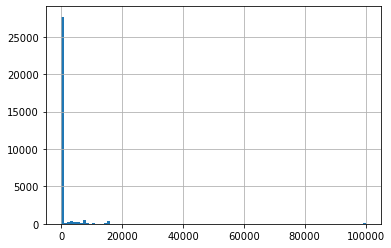

In [333]:
# Visualize each continuous column using .hist() 
# When you look at the results, consider whether the data is skewed or normally distributed.
df_train_all.capital_gain.hist(bins=100)

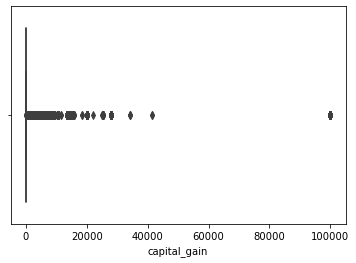

In [334]:
import seaborn as sns
# Visualize the data in a boxplot to get a better understanding of outliers and skew
sns.boxplot(df_train_all.capital_gain)

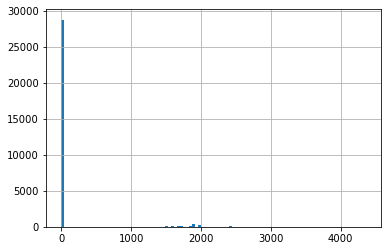

In [335]:
# Use a histogram to visualize captital loss
df_train_all.capital_loss.hist(bins=100)

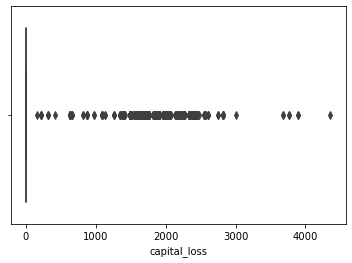

In [336]:
# Use a boxplot to visualize capital loss
sns.boxplot(df_train_all.capital_loss)

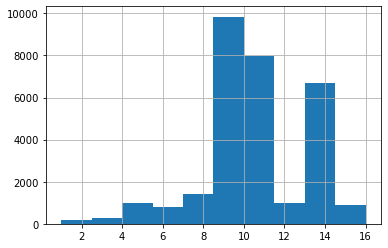

In [337]:
# Visualize education_num with .hist()
df_train_all.education_num.hist()

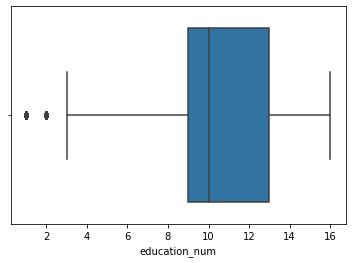

In [338]:
# Visualize education_num with boxplot
sns.boxplot(df_train_all.education_num)

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## How to deal with skew

Should you remove outliers in this data?


In [339]:
# Do NOT remove outliers.  This is census data so that's cheating!

---
### If the data is skewed, transform it here


In [340]:
# Import power transformer from sklearn
from sklearn.preprocessing import PowerTransformer

# Instantiate a PT instances
pt = PowerTransformer()

# Split features from the target in both train and test
feat_cols = [col for col in df_train_all.columns if col!='bin_income_bracket']
X_train = df_train_all[feat_cols].copy()
y_train = df_train_all.bin_income_bracket

X_test = df_test_all[feat_cols].copy()
y_test = df_test_all.bin_income_bracket

# Fit on train data and transform train data
X_train_trans = pt.fit_transform(X_train)

# Transform test data
X_test_trans = pt.transform(X_test)

---
### We a LOT of columns!  Let's look at the shape of our data


In [341]:
# Use the shape method to get the number of columns
X_train_trans.shape[1]

76

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Let's reduce the dimensionality using PCA

In [342]:
# Remember to scale data prior to PCA
# Use StandardScaler to scale the features
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler instance
scaler = StandardScaler()
# Fit on train and then transform train
X_train_scaled = scaler.fit_transform(X_train_trans)
# Transform Test
X_test_scaled = scaler.transform(X_test_trans)

In [343]:
# Perform PCA on the features
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate a PCA instance
# Typically, we want the explained variance to be between 95–99%
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X_train_scaled)
pca_cols = ['pca_'+str(i) for i in range(principalComponents.shape[1])]
X_train_pca = pd.DataFrame(data = principalComponents
             , columns = pca_cols)
X_train_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67
0,0.934307,1.577188,-0.972966,-0.637079,0.527652,-1.341626,0.272057,0.381394,0.322031,-0.421103,0.319794,-0.414284,-1.366745,-1.441114,-0.938919,-0.678578,0.481034,-1.461931,1.967987,0.793318,1.363188,-0.422781,0.268470,0.142830,0.099633,0.925848,-0.310815,0.402974,0.393821,0.105586,-0.087377,0.044095,0.020069,-0.054887,-0.146897,0.081064,-0.097856,0.134532,0.044506,-0.059878,-0.109836,-0.073206,0.096462,-0.194748,0.169891,0.301416,-0.221647,0.288363,-0.831179,0.894914,-0.111217,0.188000,0.362894,-0.344927,0.594215,-1.517663,-0.230435,0.142159,0.797864,0.469763,0.118232,0.655374,0.267287,0.191037,1.875492,-1.208530,-0.977535,0.415488
1,2.240085,-0.702087,-0.439759,-0.200516,-1.379138,0.027114,-0.413446,-0.778774,0.918885,-0.658603,0.726510,-1.219979,-0.155748,0.206592,0.061106,0.243801,0.670512,0.096832,-0.634959,0.026884,-0.288421,-0.354470,0.795575,0.564460,0.038616,0.085120,0.099724,-0.094049,0.006052,-0.078621,0.002213,-0.039828,-0.015234,0.015593,-0.001342,-0.061712,0.009062,-0.009014,0.043364,-0.015720,0.076325,0.002755,0.029479,-0.086504,-0.197857,-0.056184,0.046954,-0.049115,-0.254876,-0.160300,-0.343821,-0.146402,0.303328,0.173934,-0.563514,-0.078027,-0.385987,-0.219119,0.269113,0.663287,-0.571323,-0.941583,-0.257603,0.479973,0.119019,1.290256,0.975309,-0.677056
2,-1.161235,-0.412882,-0.120320,-1.364212,0.667644,-1.116021,0.617300,0.647303,-0.072368,0.237830,1.340986,0.091005,0.041468,-1.048421,0.773811,-0.158813,-1.095773,0.679334,-0.435367,-1.170374,-0.400363,-1.759274,-0.553387,0.702264,-0.801854,0.059547,-0.050406,-0.049059,0.229601,-0.015797,-0.053698,-0.040886,0.045414,0.011407,0.014689,-0.062238,-0.073002,-0.052098,0.026492,0.023245,0.026025,0.018597,-0.043398,-0.142098,-0.009677,0.114187,0.172828,-0.345267,0.326592,-0.647005,-0.393624,0.633457,0.678458,-0.210764,0.780696,-0.075888,0.163158,-1.200979,1.266585,0.803696,-0.641598,1.196158,0.768353,-0.641628,0.170439,-0.453234,0.705038,0.028415
3,-1.029910,-1.546070,0.100906,0.037472,1.474657,0.795967,1.324009,-0.270557,0.998736,-0.643644,1.086042,0.853856,0.202586,-1.104335,0.674204,-0.371128,-0.810887,0.551803,-0.736430,-0.874022,-0.330564,-1.795620,-0.826545,0.985226,-0.627122,-0.140139,-0.087217,0.024808,0.146774,-0.025564,-0.020132,-0.031996,0.009049,0.008534,0.026153,-0.047959,-0.055545,-0.053106,0.031624,0.029953,0.040433,0.018240,-0.048084,-0.146619,-0.067793,0.102289,0.195923,-0.203964,0.425996,-0.642362,-0.453314,0.432997,0.194673,-0.109845,0.813549,0.040712,-0.186225,-1.416156,1.692290,0.423418,-0.193080,1.377037,0.214153,-0.167158,-0.125533,-0.764645,0.520213,-2.124195
4,0.702896,2.252531,-1.051485,3.601874,-0.892212,2.843488,-0.594947,-0.305869,0.330772,-0.096066,-0.217070,1.129532,-0.335243,-0.211881,-1.097165,1.124742,-2.032230,0.260090,-0.822771,1.144583,-3.524503,1.445026,-1.655728,-0.576849,1.689870,1.696852,5.573288,-2.244943,-5.129448,2.745047,0.447034,-8.441765,0.959805,-3.144538,2.012141,3.555525,-0.111537,-2.072854,-0.042341,0.122585,1.252101,-2.266109,0.375729,-0.865543,0.295105,-4.278015,5.806469,1.030413,-2.387093,1.519104,0.605307,-0.313668,1.623423,-0.268482,5.266005,-1.106074,-1.280669,-2.987681,-1.359892,1.347424,-0.275778,0.432761,0.285529,-1.915880,0.293945,-0.877936,-0.912783,-1.986006


In [344]:
# How many columns did we have prior to PCA?
X_train.shape[1]

76

In [345]:
# How many columns do we have after PCA?
X_train_pca.shape[1]

68

In [346]:
# Apply PCA to the test set
principalComponents = pca.transform(X_test_scaled)
pca_cols = ['pca_'+str(i) for i in range(principalComponents.shape[1])]
X_test_pca = pd.DataFrame(data = principalComponents
             , columns = pca_cols)
X_test_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67
0,-2.400609,-0.935337,0.337345,-0.315401,1.073625,1.303581,1.167097,0.319213,-0.023442,-1.252967,-0.998189,-0.012056,0.356324,-2.111998,0.739129,-0.117710,0.776021,-0.429204,-1.430524,1.085164,0.166787,0.804548,0.086255,0.339648,0.399935,-0.152821,-0.001609,0.037876,-0.007184,0.040852,0.054823,0.064052,0.004763,-0.031824,0.018973,0.017924,0.004786,0.044968,0.023759,-0.006902,-0.008358,-0.037658,0.059479,-0.092788,0.026359,0.010398,0.059609,0.153638,0.205314,0.161509,-0.510863,0.115709,-0.767196,-0.056201,-0.273348,0.440710,-1.597156,-0.094698,-1.134991,-0.254123,0.118333,0.028715,-0.164838,0.553998,-0.223688,-0.485463,-0.503958,-1.618429
1,0.660391,-2.019075,0.179182,-0.001902,-0.485486,-0.326897,-2.324665,-0.831479,1.115240,-0.747712,0.879613,-1.025296,1.270053,-1.076199,0.158026,-0.014775,0.766354,-0.133394,0.082589,0.198436,-0.074201,0.325047,-0.494382,-0.336518,-0.045356,0.034781,0.203558,0.054510,-0.100407,-0.040856,-0.004331,-0.003561,0.053840,0.010173,0.041767,0.069723,0.035294,0.050622,0.069044,-0.019767,-0.008884,0.025513,0.086909,-0.184695,-0.038063,-0.212346,-0.290415,0.008921,-0.110236,-0.355552,-0.484328,-0.280860,0.155868,0.088868,-0.243467,0.226096,-0.093995,0.070052,-0.020322,-0.562529,0.476592,0.665150,0.478088,-0.633236,-1.130056,-0.696032,-0.633267,0.574475
2,1.394215,0.295845,-1.014607,1.326791,4.850787,0.435734,-0.511504,-0.549648,1.079520,3.382179,-0.871712,-1.896989,1.886381,0.949555,0.916466,-1.133363,1.723339,0.606758,0.638218,0.002778,0.277113,0.580848,0.341391,0.389666,-0.309063,-0.090494,0.151326,-0.331974,0.056407,-0.119812,-0.003933,-0.054836,0.011223,-0.045670,0.033296,-0.011610,0.024188,-0.003082,-0.084119,-0.041424,0.142130,0.026695,0.233198,0.202522,0.295733,0.061395,-0.220799,0.495181,-0.375955,-0.405402,-0.667063,-0.045164,-0.102982,0.305042,0.186476,0.022434,0.405377,-0.553735,-0.467369,0.617277,-0.031643,-0.107865,-0.131821,-0.561987,0.033186,0.199047,0.715940,0.542921
3,0.228630,-0.971301,-0.199235,1.459657,0.431347,0.581958,1.834352,-0.045310,0.265517,-1.019808,-1.052609,0.460029,0.219675,-2.595591,0.943625,-1.300895,0.179726,-1.801859,-0.773545,0.533338,0.176345,0.928172,0.302775,0.472581,0.236622,-0.016547,-0.153936,0.379609,0.263772,0.126363,0.065718,0.117677,0.001101,-0.053752,-0.020790,0.024373,-0.099072,0.070390,0.066875,-0.014195,-0.049519,-0.040514,0.019409,-0.228199,0.115811,0.169171,-0.190135,0.452539,0.186732,0.570584,-0.519500,0.063888,-0.329002,-0.024976,0.222119,0.601209,-1.554604,-0.007303,-0.719868,-0.083861,-0.176665,0.441982,-0.374308,0.797912,1.686645,-1.456283,-0.484693,-1.675161
4,-1.988111,-0.078757,0.120759,-0.364661,-0.220684,-0.887928,-0.086057,-0.749217,-0.150621,0.157988,-0.231484,-0.993931,-0.779483,0.513499,-0.226370,0.312306,-0.588498,-0.290095,0.379562,-0.194636,0.198158,0.519545,-0.097360,-0.115945,-0.326161,-0.146295,-0.137456,-0.095746,0.095465,-0.026457,-0.034133,-0.010141,0.048272,0.031973,0.008090,-0.008795,-0.029905,-0.007932,-0.018039,-0.002008,-0.023681,-0.010026,-0.024510,0.068493,0.083798,0.022528,-0.043440,-0.134641,-0.140488,0.039680,0.053876,0.184344,0.102481,0.172403,-0.077817,0.198057,0.265901,0.582058,-0.073939,-0.169864,-0.782888,0.867366,-0.032699,-0.898797,0.876580,-0.397037,1.594374,0.037433


In [347]:
# Check that test has the same number of columns as train
X_test_pca.shape[1]

68

In [348]:
# Our target variable is binary.  Let's try to run this through simple Logistic Regression model
# Remember, we only pulled in our training data.  When we are ready to test, we will need to apply
# the same changes on our test set that we applied to our train.

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_pca)

In [349]:
# Evaluate model performance
# Import evaluation tools from sklearn
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8346613545816733

In [350]:
# Model evaluation will be covered in another class
# But we'll get a quick baseline
baseline = 1 - (y_test.sum()/len(y_test))
baseline

0.7543160690571049

---
### [EXTRA] Can you improve on this score by iterating back through the feature engineering and continuing to the process?

Potential areas for improvement:

- Impute missing values
- Think more about how you remove data generally: e.g., when removing columns for collinearity during dummy encoding and collinearity checks

In [ ]:
# your code goes here


<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98729912-57be3e80-237a-11eb-80e4-233ac344b391.png"></img>
</div>